#### Case Study: Mating Success of Elephants
Predictor: Age: age at beginning in years (range from 27-52)  
Outcome: Matings: #successful matings

Question: 
- What's the relationship between mating success and age?
- Do males have diminished success after reaching some optimal age?

In [6]:
# load data
library(Sleuth3)
elmasu = case2201
Age = elmasu$Age
Matings = elmasu$Matings

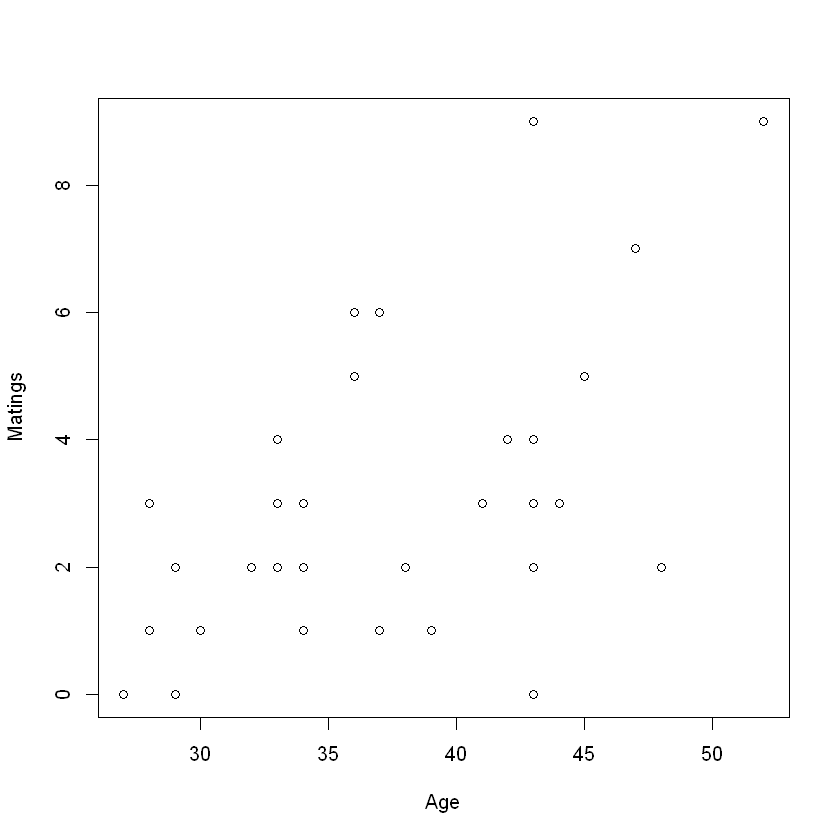

In [17]:
plot(Age, Matings)

**Why not Linear Regression**
- outcome is counts and small numbers
- won't have a normal distribution conditional on age

#### Poisson distribution
Useful for counts of rare events

Poisson link function: $g(\mu)=log(\mu)$, also called a log-linear model

Interpretation of $\beta$'s: Increase $x_j$ by one unit, and holding other predictors constant, $\mu_j$ changes by a factor of $e^{\beta_j}$

Then, $\mu = e^{X\beta}$

Estimation method: MLE by IRLS algorithm

Inference: Wald procedures and likelihood ratio test (as in logistic regression)

**Checking Model Adequacy**
(similar to binomial logistic regression)
- Linear in $\beta$'s: Plot $\log(y_i)$ vs. $x$'s to see if linear relationship is appropriate. Jitter if many $y_i = 0$ (by using $\log(y_i+k),k$ is a small positive value)
- Outliers: Deviance and Pearson residuals 
- Correct form: Wald $(\hat\beta_j/se(\hat\beta_j)^2\sim \chi^2_{p+1})$ and LRT tests
- Adequate: Deviance GOF test

Common problem: $var(Y_i) > E(Y_i)$  
Solution: add an extra dispersion


**Model log likelihood**
$$\mathcal{L} = \prod_1^n P(Y_i=y_i)=\prod_1^n \frac{e^{-\mu_i}\mu_i^{y_i}}{y_i!}$$

$$\log\mathcal{L}=\sum_1^n (-\mu_i + y_i\log(\mu_i)-\log(y_i!))$$

Since $\log(y_i)$ is a constant for $\mu_i$, we can drop it when maximizing likelihood.


In [37]:
fitllm = glm(Matings~Age, family=poisson)
summary(fit)


Call:
glm(formula = Matings ~ Age, family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.80798  -0.86137  -0.08629   0.60087   2.17777  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.58201    0.54462  -2.905  0.00368 ** 
Age          0.06869    0.01375   4.997 5.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 51.012  on 39  degrees of freedom
AIC: 156.46

Number of Fisher Scoring iterations: 5


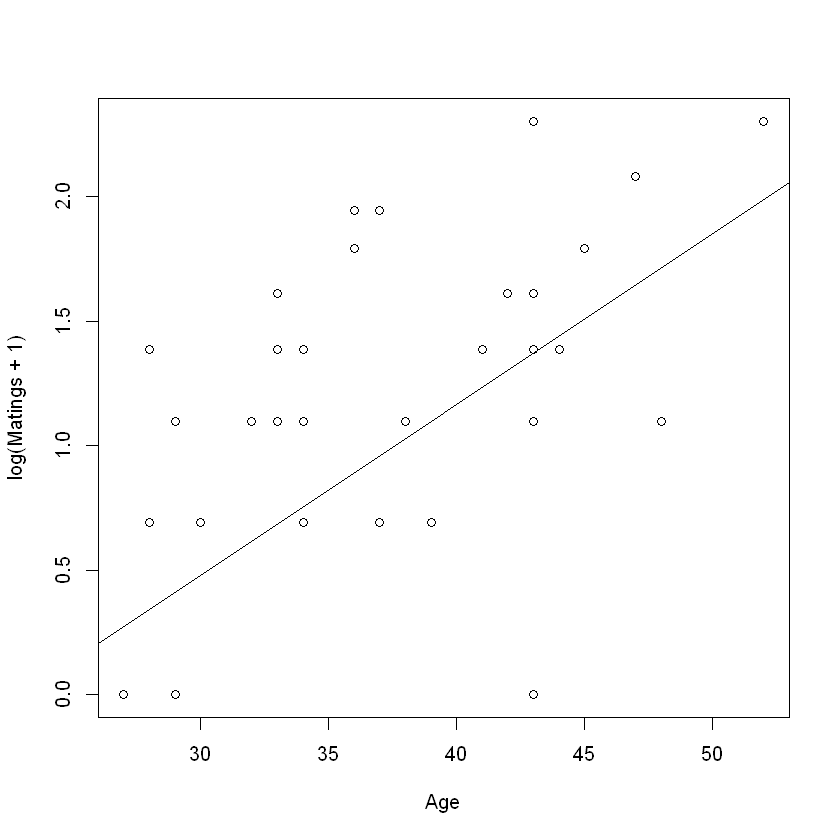

In [38]:
plot(Age, log(Matings + 1))
abline(fitllm$coefficients[1], fitllm$coefficients[2])

In [39]:
fitllm2 = glm(Matings~Age+I(Age^2), family=poisson)
summary(fitllm2)


Call:
glm(formula = Matings ~ Age + I(Age^2), family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8470  -0.8848  -0.1122   0.6580   2.1134  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.8574060  3.0356383  -0.941    0.347
Age          0.1359544  0.1580095   0.860    0.390
I(Age^2)    -0.0008595  0.0020124  -0.427    0.669

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 75.372  on 40  degrees of freedom
Residual deviance: 50.826  on 38  degrees of freedom
AIC: 158.27

Number of Fisher Scoring iterations: 5


In [41]:
print(AIC(fitllm))
print(BIC(fitllm))
print(AIC(fitllm2))
print(BIC(fitllm2))

[1] 156.4578
[1] 159.8849
[1] 158.2723
[1] 163.4131
